# Generate correlated noise

In [2]:
#imports
from importlib import reload

import os
import numpy as np
import xarray

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from datetime import datetime, time

import pandas
import seaborn as sns

#from oceancolor.pace import io as pace_io

In [3]:
%matplotlib ipympl

# Generate the correlation matrix

## Ugly for loop

In [28]:
vals = {0: 1., 1: 0.5, 2: 0.3, 3: 0.1}
cov_m = np.zeros((81,81))
for jj in range(81):
    i0 = max(0, jj-3)
    i1 = min(jj+4, 81)
    for ii in range(i0, i1):
        diff = int(np.abs(ii-jj))
        cov_m[jj,ii] = vals[diff]

## Plot

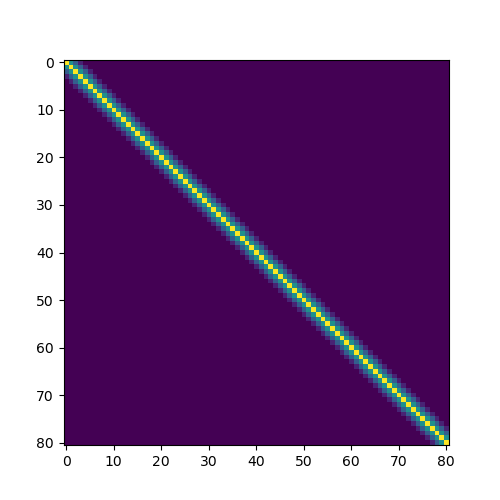

In [29]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
#
ax.imshow(cov_m)#, origin='lower')
plt.show()

# Generate the noise!

In [30]:
pts = np.random.multivariate_normal(np.zeros(81), cov_m, size=1000)

In [31]:
pts.shape

(1000, 81)

In [33]:
np.cov(pts.T)

array([[ 0.94721782,  0.50297909,  0.30318083, ...,  0.02996167,
         0.01557363, -0.00997825],
       [ 0.50297909,  1.00480077,  0.49322252, ...,  0.06575527,
         0.01000411,  0.00917133],
       [ 0.30318083,  0.49322252,  0.97279837, ...,  0.07369992,
         0.02925668,  0.0383458 ],
       ...,
       [ 0.02996167,  0.06575527,  0.07369992, ...,  1.07638919,
         0.50302178,  0.28912033],
       [ 0.01557363,  0.01000411,  0.02925668, ...,  0.50302178,
         0.9629746 ,  0.47056552],
       [-0.00997825,  0.00917133,  0.0383458 , ...,  0.28912033,
         0.47056552,  1.00284874]])

## Plot

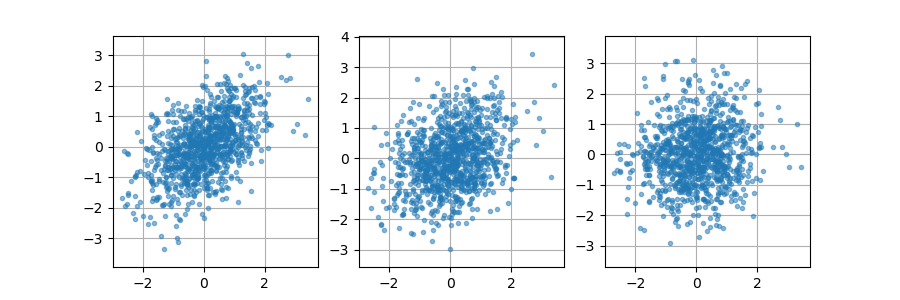

In [43]:
kk = 10
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
for ss, ax in enumerate(axes):
    ax.plot(pts[:, kk], pts[:, kk+1+ss], '.', alpha=0.5)
    ax.axis('equal')
    ax.grid()
plt.show()

----

In [26]:
tol = 1e-8
np.all( np.abs(cov_m-cov_m.T) < tol)

True